# Evaluate the Harmony question matcher using the existing McElroy et al harmonisation tool as a gold standard

This is a validation of Harmony against the questionnaire harmonisation tool developed by McElroy et al in 2020.

You can read in detail about the validation report here:

https://harmonydata.org/measuring-the-performance-of-nlp-algorithms/

You can read an explanation of the technologies evaluated here:

https://harmonydata.org/how-does-harmony-work/

In [1]:
MODEL_NAME = "Model 10: Mental Bert Transformer with cosine similarity and preprocessing for opposite senses"

import sys
sys.path.append("../front_end")
from utils.question_matcher_transformer_huggingface_negation_efficient import QuestionMatcherTransformerHuggingFaceNegationEfficient
qm = QuestionMatcherTransformerHuggingFaceNegationEfficient('mental/mental-bert-base-uncased')
match_function = lambda question_dfs : qm.match_questions(question_dfs, is_use_cosine_similarity=True)

No sentence-transformers model found with name /home/thomas/.cache/torch/sentence_transformers/mental_mental-bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/thomas/.cache/torch/sentence_transformers/mental_mental-bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model 

In [2]:
from load_validation_data import validation_data
from validation import validate

Validating on dataset McElroy et al Childhood
	Processing 47 instruments of average length 23 questions each


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/harmony/lib/python3.10/site-packages/sentence_transformers/util.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  a = torch.tensor(a)


	Calculated 562315 match scores
	Generated 40708 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES McElroy et al Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,I felt so tired I just sat around and did nothing,"""Normally energetic",0.51,1
1,Does things on Own,Is picked on or bullied by other children,0.53,1
2,Is picked on or bullied by other children,of average popularity,0.53,1
3,Stares into Space,I felt so tired I just sat around and did nothing,0.53,1
4,Cannot settle to anything for more than a few moments,average concentration,0.54,1
5,Is constantly fidgeting or squirming,"""Seldom or never restless in class",0.58,1
6,Is bullied by other children,of average popularity,0.58,1
7,Stares into Space,"Unresponse, inert or apathetic",0.58,1
8,lost much sleep over worry,Do you usually wake unnecessarily early in the morning,0.58,1
9,average concentration,been able to concentrate on whatever you're doing,0.58,1



FALSE POSITIVES OR WEAKEST REJECTIONS McElroy et al Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Has Stutter or Stammer,Has a stutter or stammer,0.97,0
1,"""Normally energetic","""Normally competitive",0.95,0
2,"Has many worries, often seems worried","Has many fears, is easily scared",0.94,0
3,"A quarrelsome and aggressive child"" or ""Takes a normal part in rough games","very anxious"" or ""Takes a normal part in rough games",0.93,0
4,"Tends to become unduly miserable or worried""","Tends to become unduly resentful"" or ""Seldom or never difficult to discipline",0.93,0
5,Cannot settle to anything for more than a few moments,Child cannot settle to do anything for more than a few moments,0.92,0
6,I laughed a lot,I cried a lot,0.92,0
7,Child destroys her own things or those belonging to others,Child takes things belonging to others,0.92,0
8,She tends to be somewhat emotional,She tends to be shy,0.92,0
9,I felt happy,I felt valued,0.92,0


Validating on dataset McElroy et al Adulthood
	Processing 28 instruments of average length 16 questions each
	Calculated 96017 match scores
	Generated 9580 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES McElroy et al Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,I felt so tired I just sat around and did nothing,exhaustion),0.46,1
1,Do you often feel tired most of the time,exhaustion),0.50,1
2,Do you feel tired most of the time,exhaustion),0.51,1
3,exhaustion),Been feeling in need of a good tonic,0.55,1
4,exhaustion),have there been days when you tired out very easily,0.55,1
5,Do you often have backache,Been feeling perfectly well and in good health,0.56,1
6,Do you suffer from indigestion,Been feeling perfectly well and in good health,0.57,1
7,I hated myself,Been satisfied with the way you've carried out your task,0.58,1
8,Do you usually wake unnecessarily early in the morning,Lost much sleep over worry,0.58,1
9,Did you have a lot of energy,exhaustion),0.59,1



FALSE POSITIVES OR WEAKEST REJECTIONS McElroy et al Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,I felt happy,I felt valued,0.92,0
1,I felt valued,I felt lonely,0.91,0
2,I felt happy,I felt lonely,0.91,0
3,Have you been a happy person,Have you been a very nervous person,0.91,0
4,i) felt that life is hardly worth living,Felt that life is entirely hopeless,0.91,0
5,Do you often feel depressed,Do you often have bad headaches,0.90,0
6,Do you often feel depressed,Do you often get worried about things,0.89,0
7,Have there been times when you have been very anxious or frightened (rate autonomic anxiety ),have you had days when your thoughts were muddled or slow,0.89,0
8,Have you felt downhearted and low,Have you felt calm and peaceful,0.89,0
9,Are you frightened of going out alone or of meeting people,Are you scared to be alone when there are not friends near you,0.89,0


Validating on dataset GAD-7 (EN/PT)
Found Portuguese dataset GAD-7 (EN/PT)
Found Portuguese dataset GAD-7 (EN/PT)
	Processing 2 instruments of average length 7 questions each
	Calculated 49 match scores
	Generated 49 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES GAD-7 (EN/PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,"Feeling afraid, as if something awful might happen",Sentir medo como se algo horrível fosse acontecer,0.58,1
1,Worrying too much about different things,Preocupar-se muito com diversas coisas,0.58,1
2,Being so restless that it is hard to sit still,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.60,1
3,"Feeling nervous, anxious, or on edge","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.61,1
4,Trouble relaxing,Dificuldade para relaxar,0.62,1
5,Becoming easily annoyed or irritable,Ficar facilmente aborrecido/a ou irritado/a,0.62,1
6,Not being able to stop or control worrying,Não ser capaz de impedir ou de controlar as preocupações,0.63,1



FALSE POSITIVES OR WEAKEST REJECTIONS GAD-7 (EN/PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Not being able to stop or control worrying,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.63,0
1,"Feeling afraid, as if something awful might happen","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.63,0
2,Not being able to stop or control worrying,Ficar facilmente aborrecido/a ou irritado/a,0.62,0
3,Being so restless that it is hard to sit still,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.62,0
4,Not being able to stop or control worrying,Dificuldade para relaxar,0.62,0
5,Not being able to stop or control worrying,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.62,0
6,Not being able to stop or control worrying,Preocupar-se muito com diversas coisas,0.62,0
7,Being so restless that it is hard to sit still,Ficar facilmente aborrecido/a ou irritado/a,0.62,0
8,Not being able to stop or control worrying,Sentir medo como se algo horrível fosse acontecer,0.61,0
9,Trouble relaxing,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.60,0


Validating on dataset BHRCS SDQ/CBCL (PT)
Found Portuguese dataset BHRCS SDQ/CBCL (PT)
Found Portuguese dataset BHRCS SDQ/CBCL (PT)
	Processing 2 instruments of average length 73 questions each
	Calculated 3025 match scores
	Generated 2725 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES BHRCS SDQ/CBCL (PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Argumenta muito para não fazer o que querem que ele faça,Argumenta muito para não fazer o que querem que ele faça,1.0,1
1,Fica confuso(a) ou desorientado(a),Fica confuso(a) ou desorientado(a),1.0,1
2,É cruel com animais,É cruel com animais,1.0,1
3,Toma bebida alcoólica sem a permissão dos pais,Toma bebida alcoólica sem a permissão dos pais,1.0,1
4,Não termina as coisas que começa,Não termina as coisas que começa,1.0,1
5,Reclama de solidão,Reclama de solidão,1.0,1
6,É desobediente na escola,É desobediente na escola,1.0,1
7,Chora muito,Chora muito,1.0,1
8,"É cruel, intimida ou faz maldade com outros","É cruel, intimida ou faz maldade com outros",1.0,1
9,Não se dá bem com outras crianças,Não se dá bem com outras crianças,1.0,1



FALSE POSITIVES OR WEAKEST REJECTIONS BHRCS SDQ/CBCL (PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,É desobediente em casa,É desobediente na escola,0.96,0
1,Vê coisas que não existem,Não termina as coisas que começa,0.96,0
2,Prefere estar com crianças mais velhos,Não se dá bem com outras crianças,0.96,0
3,Prefere estar com crianças mais novos,Não se dá bem com outras crianças,0.96,0
4,"É reservado(a), fechado(a), não conta suas coisas para ninguém","Não consegue parar sentado(a), não para quieto(a) ou é hiperativo",0.96,0
5,"É teimoso(a), mal humorado(a) ou fácil de se irritar","Não consegue parar sentado(a), não para quieto(a) ou é hiperativo",0.96,0
6,Junta muitas coisas que não precisa e que não servem para nada,Argumenta muito para não fazer o que querem que ele faça,0.95,0
7,Não vai bem na escola,Não se dá bem com outras crianças,0.95,0
8,"É pouco ativo(a), seus movimentos são lentos ou tem falta de energia",Fica grudado(a) nos adultos ou é muito dependente,0.95,0
9,"Faz birra, tem acessos de raiva ou é esquentado (a)",Fica grudado(a) nos adultos ou é muito dependente,0.95,0


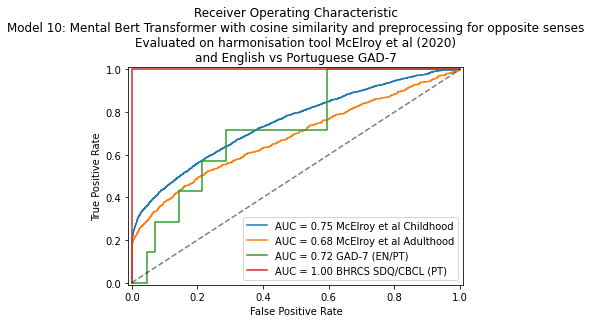

In [3]:
validate(validation_data, match_function, MODEL_NAME)